Логистическая регрессия — это один из самых простых и популярных методов
классификации, который позволяет определять, к какому из двух классов принадлежит
объект. Например, она может помочь спрогнозировать, купит ли клиент товар, одобрят ли
заявку на кредит или является ли электронное письмо спамом.

Суть логистической регрессии заключается в том, чтобы найти взаимосвязь между
входными данными и вероятностью того, что объект относится к определённому классу.
Чтобы сделать это, алгоритм строит границу, которая разделяет данные на две категории.
Эта граница может быть простой прямой (в случае работы с двумя признаками) или более
сложной плоскостью в многомерном пространстве признаков.

Работает это так: модель анализирует значения признаков объекта — например,
возраст клиента, его доход или количество покупок — и на их основе вычисляет
вероятность принадлежности к определённой категории. Если вероятность выше
порогового значения (обычно это 0,5), объект относят к положительному классу, если ниже
— к отрицательному.

Чтобы логистическая регрессия могла давать точные предсказания, её нужно
обучить на исторических данных, где известны исходы. Алгоритм анализирует эти данные,
корректируя внутренние параметры так, чтобы как можно точнее разделять объекты на
нужные группы.

После обучения модель готова к использованию на новых данных. Например, если
нужно понять, уйдёт ли клиент из компании, логистическая регрессия оценит вероятность
исходя из его поведения и характеристик.

In [1]:
import numpy as np
from sklearn import linear_model

In [2]:
from Utilites import visualize_classifier

In [3]:
X=np.array([[3.1, 7.2], [4, 6.7], [2.9, 8], [5.1, 4.5], [6, 5], [5.6, 5], [3.3, 0.4], [3.9, 0.9], [2.8, 1], [0.5, 3.4], [1, 4], [0.6, 4.9]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3])

In [4]:
classifier = linear_model.LogisticRegression(solver='liblinear', C=1)
classifier.fit(X,y)

LogisticRegression(C=1, solver='liblinear')

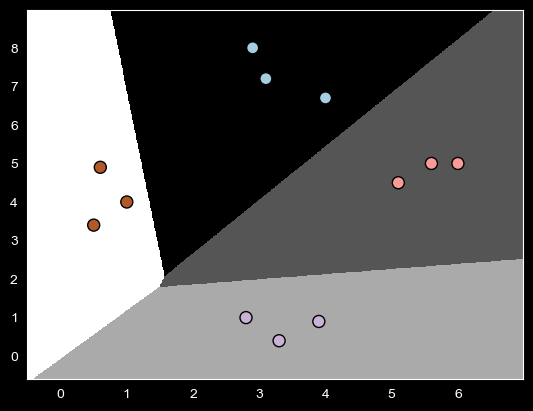

In [5]:
visualize_classifier(classifier, X, y)

Пример:

Представим, что у нас есть данные о клиентах интернет-магазина, и мы хотим
предсказать, купит ли новый посетитель товар. Для этого мы используем информацию о
его возрасте, среднем чеке предыдущих покупок и времени, проведённом на сайте. Мы
обучаем логистическую регрессию на исторических данных, где известно, кто из клиентов
совершал покупки, а кто — нет. После обучения модель сможет прогнозировать
вероятность покупки для новых посетителей.

Допустим, для нового клиента алгоритм рассчитал вероятность 0,8. Так как это
значение выше порогового (0,5), мы делаем вывод, что клиент, скорее всего, совершит
покупку, и можем предложить ему персональную скидку, чтобы повысить вероятность
сделки

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [7]:
# Создаём примерные данные о клиентах
data = {
'Возраст': [25, 30, 45, 35, 23, 50, 40, 29, 60, 27],
'Средний_чек': [40, 55, 80, 60, 35, 90, 70, 50, 95, 45],
'Время_на_сайте': [5, 10, 15, 12, 4, 20, 18, 9, 25, 7],
'Совершил_покупку': [0, 1, 1, 1, 0, 1, 1, 0, 1, 0]
}

In [8]:
# Преобразуем данные в DataFrame
df = pd.DataFrame(data)

In [9]:
# Разделяем признаки и целевую переменную
X = df[['Возраст', 'Средний_чек', 'Время_на_сайте']]
y = df['Совершил_покупку']

In [10]:
# Делим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Создаём и обучаем модель логистической регрессии
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
#Оцениваем точность модели
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy:.2f}')

Точность модели: 0.50


In [13]:
# Прогноз для нового клиента
new_client = pd.DataFrame({
'Возраст': [32],
'Средний_чек': [65],
'Время_на_сайте': [14]
})
# Рассчитываем вероятность покупки
probably = model.predict_proba(new_client)[0][1]
print(f'Вероятность покупки: {probably:.2f}')
# Интерпретация результата
if probably > 0.5:
    print("Клиент, скорее всего, совершит покупку. Можно предложить скидку.")
else:
    print("Клиент, вероятно, не купит товар. Возможно, стоит предложить бонус.")

Вероятность покупки: 0.99
Клиент, скорее всего, совершит покупку. Можно предложить скидку.
